In [1]:
import clean_df
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import re
import warnings
import importlib
warnings.filterwarnings('ignore')
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

In [2]:
importlib.reload(clean_df)

<module 'clean_df' from 'C:\\Users\\Faith Bagire\\PycharmProjects\\pythonProject\\Telecomm_data_analysis\\clean_df.py'>

In [3]:
#Find the outliers

def outlier_bound(df):
    bounds={}
    for col in cols_numeric:
        q1=df[col].quantile(0.05)  #0.05
        q3=df[col].quantile(0.95)   #0.95
        lower_b=q1-(1.5*(q3-q1))
        upper_b=q3+(1.5*(q3-q1))
        bounds[col]=[lower_b,upper_b]
    return bounds

In [4]:
#Replace the outliers with mean value This helps with the computational analysis.
def outlier_remove(df):
    bounds=outlier_bound(df)
    for col in cols_numeric:
        mean_use=df[col][(df[col] > bounds[col][0]) & (df[col] < bounds[col][1])].mean()
        df[col].where((df[col]>bounds[col][0])&(df[col]<bounds[col][1]),mean_use,inplace=True)
    return df

In [5]:
df_original = pd.read_excel('Week1_challenge_data_source.xlsx',
                            dtype={'Bearer Id': str, 'IMSI': str,'MSISDN/Number': str, 'IMEI': str,
                                  'Handset Manufacturer':str,'Handset Type':str}, engine='openpyxl')

In [74]:
df=df_original.copy(deep=True)

In [75]:
cleaning_df=clean_df.CleanDataframe(df)

In [76]:
print(df.shape)
df.head()

(150001, 55)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,208201448079117,33664962239,35521209507511,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,208201909211140,33681854413,35794009006359,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,208200314458056,33760627129,35281510359387,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,208201402342131,33750343200,35356610164913,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,208201401415120,33699795932,35407009745539,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [77]:
df.dtypes

Bearer Id                                           object
Start                                       datetime64[ns]
Start ms                                           float64
End                                         datetime64[ns]
End ms                                             float64
Dur. (ms)                                          float64
IMSI                                                object
MSISDN/Number                                       object
IMEI                                                object
Last Location Name                                  object
Avg RTT DL (ms)                                    float64
Avg RTT UL (ms)                                    float64
Avg Bearer TP DL (kbps)                            float64
Avg Bearer TP UL (kbps)                            float64
TCP DL Retrans. Vol (Bytes)                        float64
TCP UL Retrans. Vol (Bytes)                        float64
DL TP < 50 Kbps (%)                                float

In [78]:
df.describe()

,Start ms,End ms,Dur. (ms),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,45.000000,5.000000,63.000000,63.000000,5.687300e+05,2.094950e+04,100.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,70.000000,15.000000,19710.750000,1120.000000,3.768308e+06,8.402025e+04,100.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,96923.000000,7120.000000,378160.000000,58613.000000,4.294426e+09,2.908226e+09,100.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


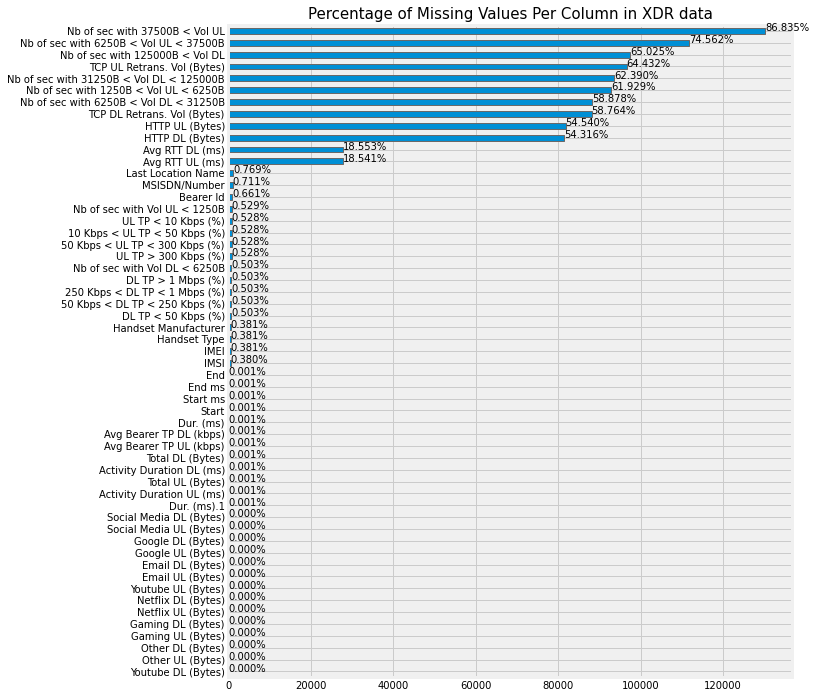

In [79]:
cleaning_df.check_missing_values()

In [80]:
bytes_data = ['Total UL (Bytes)', 'Total DL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
                'Email DL (Bytes)', 'Email UL (Bytes)','Google DL (Bytes)', 'Google UL (Bytes)',
              'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
              'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)']

In [81]:
# !! Run it once
df=cleaning_df.convert_bytes_to_megabytes(bytes_data)

In [153]:
#Change millsecond to Seconds
df['Dur. (ms)']=df['Dur. (ms)']/1000

In [154]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social Media Total (megabytes),Email Total (megabytes),Google Total (megabytes),Youtube Total (megabytes),Netflix Total (megabytes),Gaming Total (megabytes),Other Total (megabytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,102.675302,208201448079117,33664962239,35521209507511,9164566995485190,...,8.814393,36.749741,308.879636,1.570185,3.701304,2.905912,18.355943,17.855187,292.426453,180.558843
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,102.675302,208201909211140,33681854413,35794009006359,L77566A,...,15.055145,53.800391,653.384965,1.933278,0.937385,4.414096,39.359124,35.565545,609.920783,541.959383
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,102.675302,208200314458056,33760627129,35281510359387,D42335A,...,4.215763,27.883638,279.807335,1.726277,3.363124,10.229119,34.425237,23.751202,229.980251,414.908351
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,102.675302,208201402342131,33750343200,35356610164913,T21824A,...,12.797283,43.324218,846.028530,0.657493,2.070983,11.811761,36.534765,15.092588,810.387875,761.837216
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,102.675302,208201401415120,33699795932,35407009745539,D88865A,...,13.910322,38.542814,569.138589,0.912788,2.110349,7.748843,34.222253,17.539799,531.237049,564.619822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,13042425979329300480,2019-04-29 07:28:41,615.0,2019-04-30 00:01:49,407.0,59.587000,208201402604057,33668648496,35332510508318,T85721A,...,14.890486,53.745392,819.016468,0.993175,4.280107,1.265634,24.553645,29.618711,797.160102,336.273648
149996,7277825670196679680,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81.230000,208202201200072,33650688697,35483109451938,D20434A,...,13.487416,57.628851,574.175259,3.517065,0.690876,12.784914,27.955095,37.561864,535.806880,16.751926
149997,7349883264234609664,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97.970000,208201908153249,33663449963,35660508296467,D10223C,...,2.457758,39.135081,666.648844,2.352181,2.121718,4.415361,22.165518,40.643294,631.628095,714.638145
149998,13114483573367300096,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98.249000,208201711161187,33621890103,35721209870907,T51102A,...,11.314729,34.912224,592.786405,1.260239,2.058277,6.585469,24.516413,15.029702,566.933800,132.415585


**Remove columns with >25% Missing values and irrelevant columns**

In [82]:
df=cleaning_df.drop_unwanted_columns()

**Drop some data**

Because we are interested in xDR sessions, it is important to allocate the session to  certain user and as we can’t impute the  xDr session identifier (“Bearer Id”),  We will drop these data. Bearer Id is crucial because xDR session with no "Bearer Id" , also has "no Last Location Name"

Moreover a user with no any of **'IMEI','IMSI','MSISDN/Number'** can not be identified hence dropped as well

In [83]:
df.dropna(how='all',subset=['IMEI','IMSI','MSISDN/Number'],inplace=True)
df.dropna(subset=['Bearer Id'],inplace=True)

In [84]:
df.shape #149431

(149001, 44)

In [86]:
df.isna().sum()

Bearer Id                             0
Start                                 0
Start ms                              0
End                                   0
End ms                                0
Dur. (ms)                             0
IMSI                                  0
MSISDN/Number                       495
IMEI                                  2
Last Location Name                  162
Avg RTT DL (ms)                   27685
Avg RTT UL (ms)                   27666
Avg Bearer TP DL (kbps)               0
Avg Bearer TP UL (kbps)               0
DL TP < 50 Kbps (%)                 716
50 Kbps < DL TP < 250 Kbps (%)      716
250 Kbps < DL TP < 1 Mbps (%)       716
DL TP > 1 Mbps (%)                  716
UL TP < 10 Kbps (%)                 770
10 Kbps < UL TP < 50 Kbps (%)       770
50 Kbps < UL TP < 300 Kbps (%)      770
UL TP > 300 Kbps (%)                770
Activity Duration DL (ms)             0
Activity Duration UL (ms)             0
Handset Manufacturer                  2


In [87]:
# xDR with "IMEI" missing , also has "no MSISDN/Number"
#xDR with no "Bearer Id" , also has "no Last Location Name" 

df[df['IMEI'].isnull() & df['MSISDN/Number'].isnull()]

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
58263,6917537689702479872,2019-04-25 23:05:05,714.0,2019-04-26 23:11:28,12.0,86782.0,208209502714942,NaN,NaN,U74261B,...,1.215176,6.041132,1.418313,5.665048,596.717529,8.854054,642.690544,11.469281,34.369618,611.874376
79882,6917537694121520128,2019-04-27 07:44:50,593.0,2019-04-27 23:11:06,529.0,55575.0,208209502746727,NaN,NaN,W21110C,...,17.202372,21.288822,19.270040,3.265093,62.871774,11.659446,618.554992,15.807139,55.218094,106.751651


In [88]:
#Filling in missing values using mean value or median value depending on the previous histogram and skeweness
df=cleaning_df.fill_missing_values(cols_numeric,cols_cat)

In [89]:
df.isna().sum()

Bearer Id                           0
Start                               0
Start ms                            0
End                                 0
End ms                              0
Dur. (ms)                           0
IMSI                                0
MSISDN/Number                     495
IMEI                                2
Last Location Name                162
Avg RTT DL (ms)                     0
Avg RTT UL (ms)                     0
Avg Bearer TP DL (kbps)             0
Avg Bearer TP UL (kbps)             0
DL TP < 50 Kbps (%)                 0
50 Kbps < DL TP < 250 Kbps (%)      0
250 Kbps < DL TP < 1 Mbps (%)       0
DL TP > 1 Mbps (%)                  0
UL TP < 10 Kbps (%)                 0
10 Kbps < UL TP < 50 Kbps (%)       0
50 Kbps < UL TP < 300 Kbps (%)    770
UL TP > 300 Kbps (%)              770
Activity Duration DL (ms)           0
Activity Duration UL (ms)           0
Handset Manufacturer                0
Handset Type                        0
Nb of sec wi

In [90]:
# separating columns based on datatypes
cols_numeric=df.columns.difference(['Bearer Id','Start','End','IMSI','MSISDN/Number','IMEI','Last Location Name',
                                    'Handset Manufacturer','Handset Type']).to_list()
cols_cat=['Handset Manufacturer','Handset Type']

**Check the skewness before ploting histogram (No need to plot Normally Distributed variables)**

In [91]:
print('Skewness of the data per column, >0 being skewed to right, 0 normally distrbuted and <-1 skewed to negative')
df.skew(axis=0,numeric_only=True)

Skewness of the data per column, >0 being skewed to right, 0 normally distrbuted and <-1 skewed to negative


Start ms                           0.000931
End ms                            -0.000945
Dur. (ms)                          3.963390
Avg RTT DL (ms)                   73.820319
Avg RTT UL (ms)                   31.476780
Avg Bearer TP DL (kbps)            2.587859
Avg Bearer TP UL (kbps)            4.499512
DL TP < 50 Kbps (%)               -2.306358
50 Kbps < DL TP < 250 Kbps (%)     3.282252
250 Kbps < DL TP < 1 Mbps (%)      4.582708
DL TP > 1 Mbps (%)                 5.374447
UL TP < 10 Kbps (%)               -9.006774
10 Kbps < UL TP < 50 Kbps (%)     10.973845
50 Kbps < UL TP < 300 Kbps (%)    21.832919
UL TP > 300 Kbps (%)              36.150775
Activity Duration DL (ms)          5.857571
Activity Duration UL (ms)          7.365253
Nb of sec with Vol DL < 6250B      9.042134
Nb of sec with Vol UL < 1250B      7.499350
Social Media DL (Bytes)           -0.002053
Social Media UL (Bytes)           -0.000376
Google DL (Bytes)                 -0.008320
Google UL (Bytes)               

In [92]:
cols_hist=set(cols_numeric)-set(bytes_data)-set(['Start ms', 'End ms'])

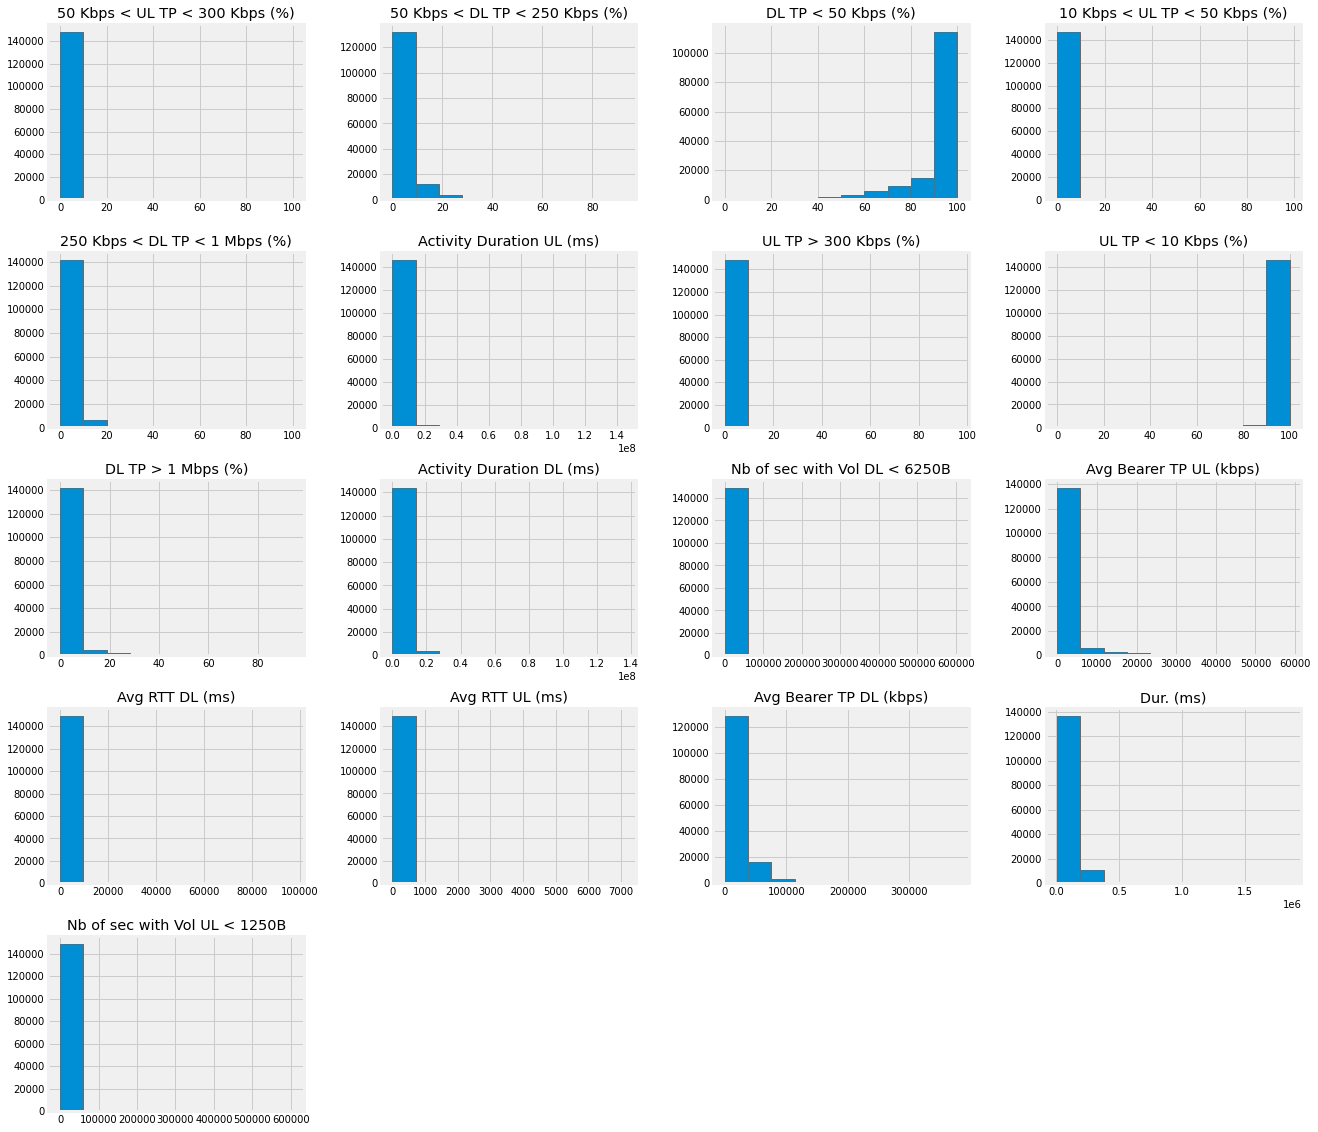

In [93]:
#Distribution of numeric variables
_=df[cols_hist].hist(figsize=(20,20))

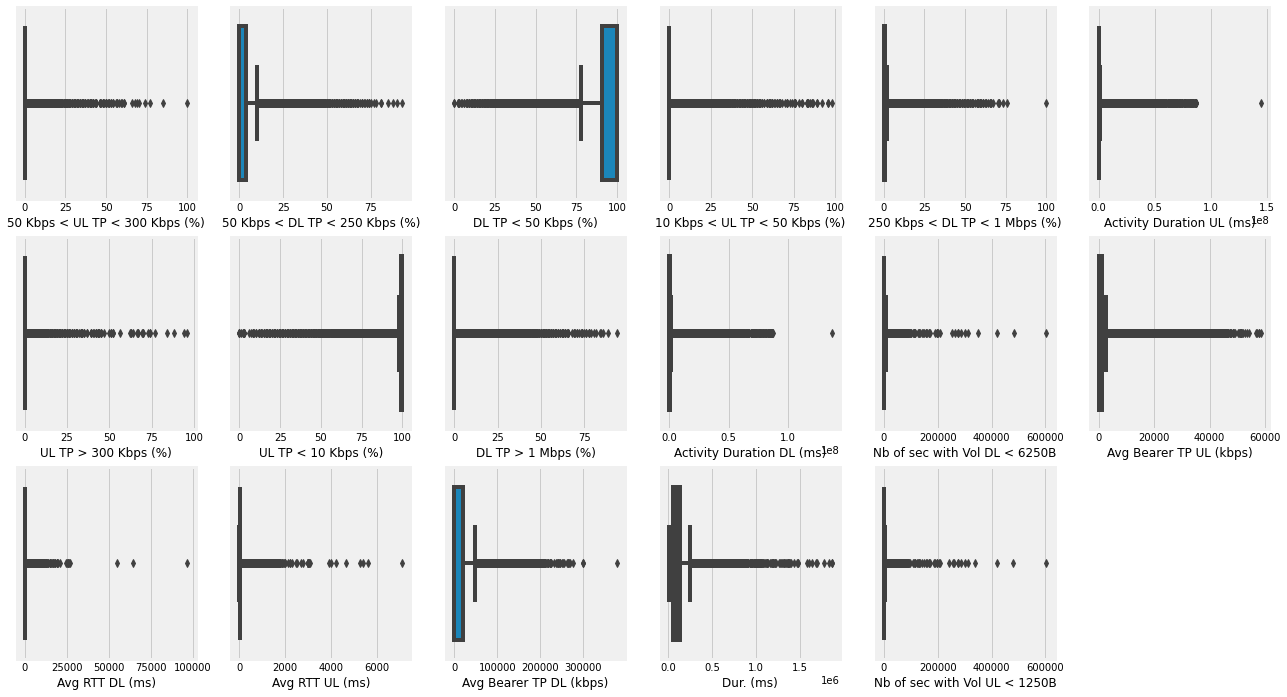

In [94]:
fig, axs = plt.subplots(3, 6,figsize=(20,12))
axe = axs.ravel()
for i, var in enumerate(cols_hist):
    sns.boxplot(x=var,data=df,ax=axe[i])
    
gl = len(cols_hist)
for i in range(18 - gl):
    fig.delaxes(ax=axe[gl + i])

In [95]:
df=outlier_remove(df)

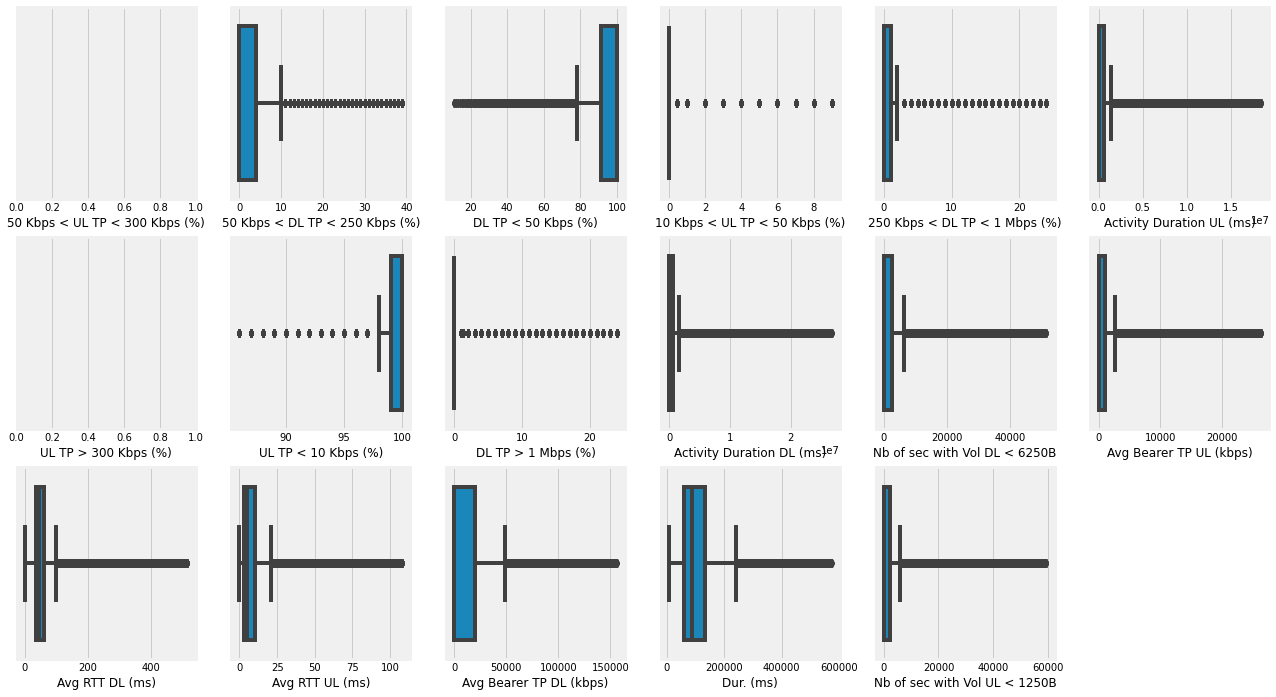

In [96]:
fig, axs = plt.subplots(3, 6,figsize=(20,12))
axe = axs.ravel()
for i, var in enumerate(cols_hist):
    sns.boxplot(x=var,data=df,ax=axe[i])
    
gl = len(cols_hist)
for i in range(18 - gl):
    fig.delaxes(ax=axe[gl + i])

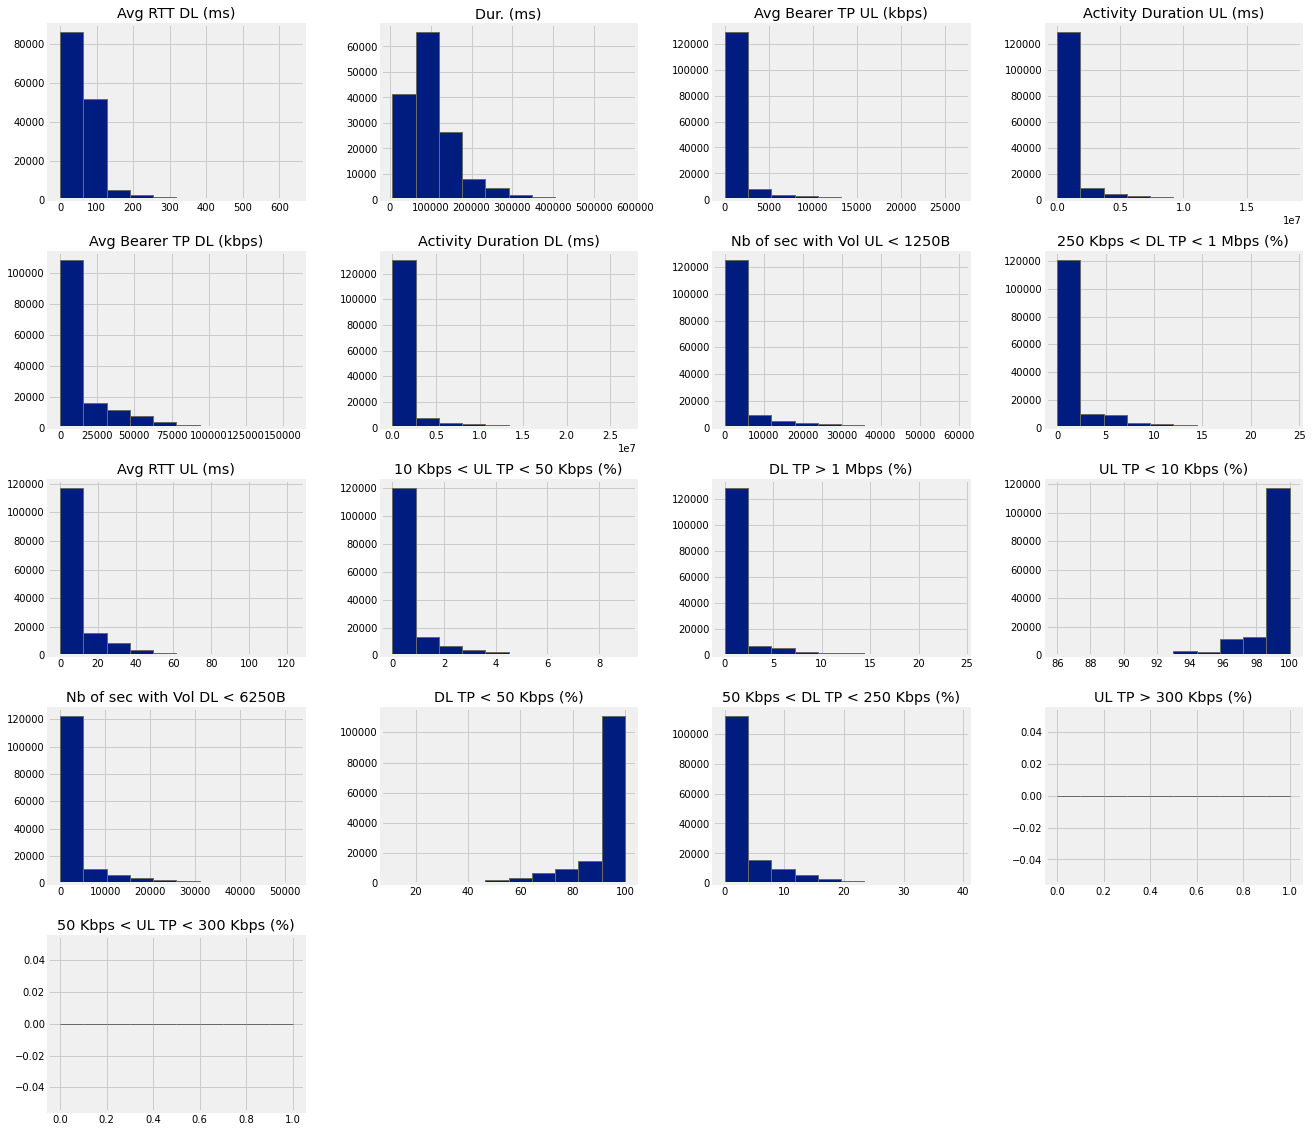

In [186]:
_=df[cols_hist].hist(figsize=(20,20))

In [97]:
# remove two columns that are dominantly zero
df.drop(['50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)'],axis=1,inplace=True)

In [98]:
cols_numeric.remove('UL TP > 300 Kbps (%)')
cols_numeric.remove('50 Kbps < UL TP < 300 Kbps (%)')

In [104]:

print('Skewness of the data per column after removing outliers: \n>0 being skewed to right'
      '\n0 normally distrbuted \n<-1 skewed to negative')
df.skew(axis=0,numeric_only=True)

Skewness of the data per column after removing outliers: 
>0 being skewed to right
0 normally distrbuted 
<-1 skewed to negative


Start ms                          0.000931
End ms                           -0.000945
Dur. (ms)                         1.861641
Avg RTT DL (ms)                   3.992625
Avg RTT UL (ms)                   3.060338
Avg Bearer TP DL (kbps)           2.210903
Avg Bearer TP UL (kbps)           3.705619
DL TP < 50 Kbps (%)              -2.285101
50 Kbps < DL TP < 250 Kbps (%)    2.603043
250 Kbps < DL TP < 1 Mbps (%)     3.001637
DL TP > 1 Mbps (%)                3.688731
UL TP < 10 Kbps (%)              -3.102975
10 Kbps < UL TP < 50 Kbps (%)     3.667273
Activity Duration DL (ms)         3.936312
Activity Duration UL (ms)         3.889712
Nb of sec with Vol DL < 6250B     3.082173
Nb of sec with Vol UL < 1250B     3.308102
Social Media DL (Bytes)          -0.002053
Social Media UL (Bytes)          -0.000376
Google DL (Bytes)                -0.008320
Google UL (Bytes)                 0.002013
Email DL (Bytes)                 -0.002471
Email UL (Bytes)                  0.006946
Youtube DL 

**Drop Duplicates**

In [106]:
df[df.duplicated()]

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)


In [107]:
# Fix the string types and capitalize them 
df=cleaning_df.fix_data_types()

In [108]:
#Find total data volume for each application
df['Social Media Total (megabytes)'] = df['Social Media DL (Bytes)'] + df['Social Media UL (Bytes)']
df['Email Total (megabytes)'] = df['Email DL (Bytes)'] + df['Email UL (Bytes)']
df['Google Total (megabytes)'] = df['Google DL (Bytes)'] + df['Google UL (Bytes)']
df['Youtube Total (megabytes)'] = df['Youtube DL (Bytes)'] + df['Youtube UL (Bytes)']
df['Netflix Total (megabytes)'] = df['Netflix DL (Bytes)'] + df['Netflix UL (Bytes)']
df['Gaming Total (megabytes)'] = df['Gaming DL (Bytes)'] + df['Gaming UL (Bytes)']
df['Other Total (megabytes)'] = df['Other DL (Bytes)'] + df['Other UL (Bytes)']

#### Top 10 handsets used by the customers and  Top 3 handset manufacturers

In [109]:
plt.style.use('seaborn-dark-palette')

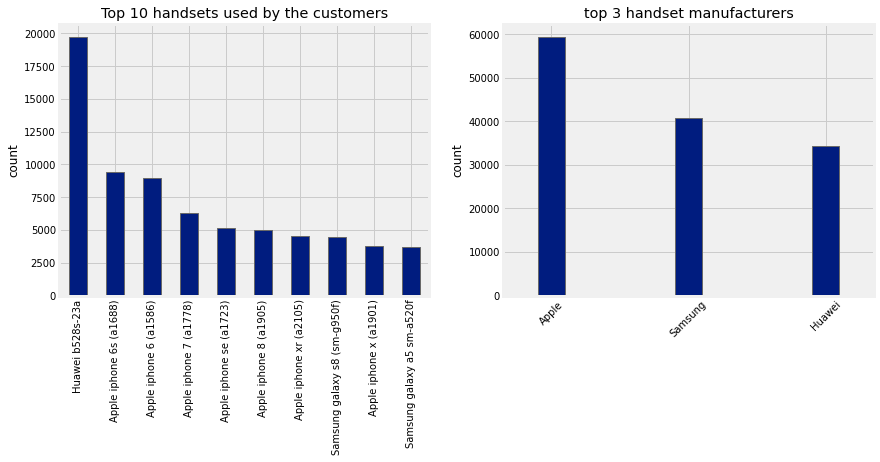

In [110]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))
_ = df.query('`Handset Type`!="Undefined"')['Handset Type'].value_counts()[:10].plot(kind='bar', ylabel='count', rot=90,
                                                                                     ax=axs[0],
                                                                                     title='Top 10 handsets used by '
                                                                                           'the customers')
_ = df.query('`Handset Manufacturer`!="Undefined"')['Handset Manufacturer'].value_counts()[:3].plot(kind='bar',ylabel='count',rot=45,width=0.2,
                                                                            ax=axs[1],title='top 3 handset manufacturers')

#### top 5 handsets per top 3 handset manufacturer

In [111]:
df_manfact_goup=df.query('`Handset Manufacturer`=="Apple" or `Handset Manufacturer`=="Samsung"\
                           or `Handset Manufacturer`=="Huawei"')

In [112]:
df_manfact_goup=df_manfact_goup.groupby(['Handset Manufacturer','Handset Type']).aggregate({'Handset Type':'count'})
pd.DataFrame(df_manfact_goup['Handset Type'].groupby('Handset Manufacturer',group_keys=False).nlargest(5))

Handset Type
Handset Manufacturer Handset Type                                
Apple                Apple iphone 6s (a1688)                 9401
                     Apple iphone 6 (a1586)                  9004
                     Apple iphone 7 (a1778)                  6301
                     Apple iphone se (a1723)                 5176
                     Apple iphone 8 (a1905)                  4985
Huawei               Huawei b528s-23a                       19752
                     Huawei e5180                            2079
                     Huawei p20 lite huawei nova 3e          2015
                     Huawei p20                              1476
                     Huawei y6 2018                           996
Samsung              Samsung galaxy s8 (sm-g950f)            4504
                     Samsung galaxy a5 sm-a520f              3716
                     Samsung galaxy j5 (sm-j530)             3689
                     Samsung galaxy j3 (sm-j330)             3476
                     Samsung galaxy s7 (sm-g930x)            3194

In [134]:
df_grouped_bytesdata = df.groupby('IMEI').aggregate({'Bearer Id': 'count', 'Total UL (Bytes)': 'sum',
                                                     'Dur. (ms)': 'sum', 'Total DL (Bytes)': 'sum',
                                                     
                                                     'Youtube DL (Bytes)': 'sum', 'Youtube UL (Bytes)': 'sum',
                                                     'Google DL (Bytes)': 'sum', 'Google UL (Bytes)': 'sum',
                                                     'Netflix DL (Bytes)': 'sum', 'Netflix UL (Bytes)': 'sum',
                                                     'Gaming DL (Bytes)': 'sum', 'Gaming UL (Bytes)': 'sum',
                                                     'Other DL (Bytes)': 'sum', 'Other UL (Bytes)': 'sum',
                                                     'Social Media Total (megabytes)': 'sum',
                                                     'Email Total (megabytes)': 'sum',
                                                     'Google Total (megabytes)': 'sum',
                                                     'Youtube Total (megabytes)': 'sum',
                                                     'Netflix Total (megabytes)': 'sum',
                                                     'Gaming Total (megabytes)': 'sum',
                                                     'Other Total (megabytes)': 'sum',
                                                     'IMSI': 'nunique', 'MSISDN/Number': 'nunique',
                                                     'Handset Manufacturer': 'unique'}).sort_values(by='Bearer Id',
                                                                                                    ascending=False)
df_grouped_bytesdata.rename(columns={'Bearer Id':'Xdr sessions count'},inplace=True)

In [137]:
df_grouped_bytesdata['Handset Manufacturer'] = df_grouped_bytesdata['Handset Manufacturer'].apply(lambda x: x[0])

In [138]:
df_grouped_bytesdata

,Xdr sessions count,Total UL (Bytes),Dur. (ms),Total DL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),...,Social Media Total (megabytes),Email Total (megabytes),Google Total (megabytes),Youtube Total (megabytes),Netflix Total (megabytes),Gaming Total (megabytes),Other Total (megabytes),IMSI,MSISDN/Number,Handset Manufacturer
IMEI,,,,,,,,,,,,,,,,,,,,,
35182310355840,18,669.650721,4.314666e+06,7301.516540,164.048706,210.434341,116.106455,36.085397,199.479238,129.246502,...,43.374779,42.418782,152.191852,374.483047,328.725740,6887.572116,8167.877776,1,1,Samsung
35746309624511,17,689.483001,3.279528e+06,8156.743493,199.823443,194.546775,93.941708,34.032079,179.585986,181.815060,...,28.294544,40.788634,127.973787,394.370218,361.401046,7749.432234,7639.263572,1,1,Samsung
35281410321760,17,729.577380,2.720156e+06,7770.043342,237.883033,215.075736,107.904739,34.403176,193.912238,163.068369,...,27.135500,40.633966,142.307915,452.958769,356.980607,7326.673487,6354.583086,1,1,Samsung
86948003612677,16,624.260321,4.035428e+06,7081.602462,119.658146,138.332942,90.958549,25.557796,196.277206,203.241873,...,35.412358,35.999792,116.516345,257.991088,399.519079,6725.559211,6317.415487,1,1,Huawei
86724003047878,15,581.568792,3.806736e+06,7309.541816,158.665235,158.745337,83.002994,26.857508,161.626462,147.466697,...,19.222921,31.514421,109.860502,317.410572,309.093159,6970.567597,6798.515150,1,1,Huawei
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35573009839003,1,55.983728,1.826600e+05,730.080293,10.230896,20.286239,11.033820,2.400310,11.981141,11.844794,...,1.927145,1.011832,13.434130,30.517135,23.825935,702.349947,470.133727,1,1,Samsung
35573009838919,1,23.605350,1.751610e+05,144.810022,2.206654,1.602020,11.058339,3.402679,5.891084,10.004457,...,0.394591,0.424875,14.461018,3.808674,15.895541,126.476940,34.175168,1,1,Samsung
35573009838674,1,23.001964,1.467060e+05,283.029399,3.015828,14.943039,2.345918,1.189904,7.257755,0.730852,...,0.308444,3.666257,3.535822,17.958867,7.988607,267.741726,344.098340,1,1,Samsung


In [139]:
df_grouped_bytesdata.describe()

,Xdr sessions count,Total UL (Bytes),Dur. (ms),Total DL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Google DL (Bytes),Google UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),...,Other UL (Bytes),Social Media Total (megabytes),Email Total (megabytes),Google Total (megabytes),Youtube Total (megabytes),Netflix Total (megabytes),Gaming Total (megabytes),Other Total (megabytes),IMSI,MSISDN/Number
count,106885.000000,106885.000000,1.068850e+05,106885.000000,106885.000000,106885.000000,106885.000000,106885.000000,106885.000000,106885.000000,...,106885.000000,106885.000000,106885.000000,106885.000000,106885.000000,106885.000000,106885.000000,106885.000000,106885.0,106885.000000
mean,1.394012,57.324752,1.431312e+05,633.838228,16.216596,15.347365,8.017633,2.866851,16.206656,15.337915,...,11.518796,2.548460,3.149126,10.884483,31.563961,31.544570,599.953583,598.594978,1.0,0.996192
std,0.806620,35.679204,1.481372e+05,464.775045,12.328774,11.602545,6.067605,2.174070,12.323485,11.614159,...,8.711019,1.909446,2.223708,7.548601,21.306001,21.300665,449.356615,449.161536,0.0,0.061742
min,1.000000,2.866892,7.142000e+03,8.827082,0.000053,0.000106,0.000207,0.000003,0.000042,0.000035,...,0.000156,0.001563,0.018176,0.040330,0.078903,0.184569,0.306358,0.149045,1.0,0.000000
25%,1.000000,36.398286,7.163500e+04,314.969167,7.646795,7.246077,3.802152,1.341534,7.593220,7.211610,...,5.460553,1.210999,1.674523,5.942495,18.625069,18.564509,288.192545,285.656755,1.0,1.000000
50%,1.000000,46.796435,1.026753e+05,570.358875,14.602645,13.875743,7.256116,2.594212,14.637675,13.880640,...,10.377559,2.304288,2.798801,9.587432,26.800224,26.720458,542.372913,539.710122,1.0,1.000000
75%,2.000000,65.752847,1.727990e+05,807.471998,21.128351,19.978862,10.432543,3.744109,21.133606,20.014028,...,15.027620,3.307992,3.847205,13.215379,37.933647,37.977215,777.426472,775.328828,1.0,1.000000
max,18.000000,729.577380,4.314666e+06,8156.743493,237.883033,215.075736,116.106455,36.085397,199.479238,203.241873,...,152.930478,43.374779,42.418782,152.191852,452.958769,399.519079,7749.432234,8167.877776,1.0,2.000000


In [140]:
df_manfact=df.query('`Handset Manufacturer`=="Apple" or `Handset Manufacturer`=="Samsung" \
                    or `Handset Manufacturer`=="Huawei"')

In [141]:
def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

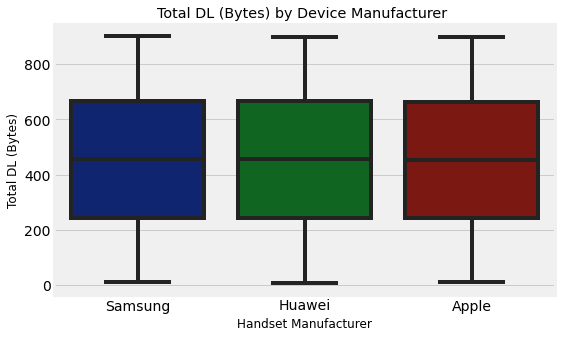

In [142]:
plot_box_multi(df_manfact,x_col="Handset Manufacturer",
               y_col="Total DL (Bytes)",title="Total DL (Bytes) by Device Manufacturer ")

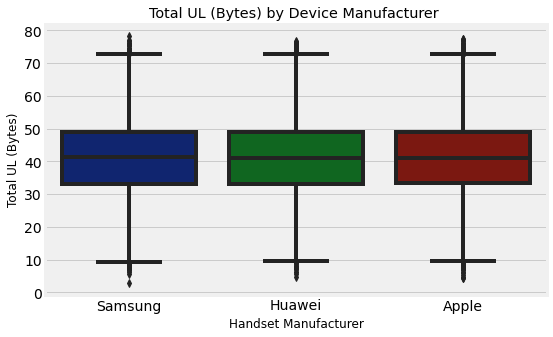

In [143]:
plot_box_multi(df_manfact,x_col="Handset Manufacturer",
               y_col="Total UL (Bytes)",title="Total UL (Bytes) by Device Manufacturer ")

In [144]:
apps_usage=df.aggregate({'Social Media Total (megabytes)': ['sum', 'mean', 'median'],
              'Email Total (megabytes)': ['sum', 'mean', 'median'],
              'Google Total (megabytes)': ['sum', 'mean', 'median'],
              'Youtube Total (megabytes)': ['sum', 'mean', 'median'],
              'Netflix Total (megabytes)': ['sum', 'mean', 'median'],
              'Gaming Total (megabytes)': ['sum', 'mean', 'median'],
              'Other Total (megabytes)': ['sum', 'mean', 'median']})

In [145]:
apps_usage

,Social Media Total (megabytes),Email Total (megabytes),Google Total (megabytes),Youtube Total (megabytes),Netflix Total (megabytes),Gaming Total (megabytes),Other Total (megabytes)
sum,272396.244306,336600.461891,1.163403e+06,3.373760e+06,3.371671e+06,6.412672e+07,6.398211e+07
mean,1.828150,2.259048,7.808023e+00,2.264253e+01,2.262851e+01,4.303778e+02,4.294073e+02
median,1.826209,2.263616,7.814744e+00,2.266042e+01,2.263642e+01,4.316737e+02,4.299981e+02


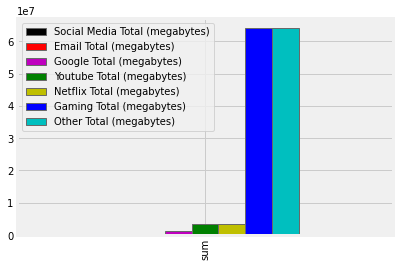

In [146]:
_=apps_usage.loc[['sum']].plot(kind='bar',color=['k','r','m','g','y','b','c'])

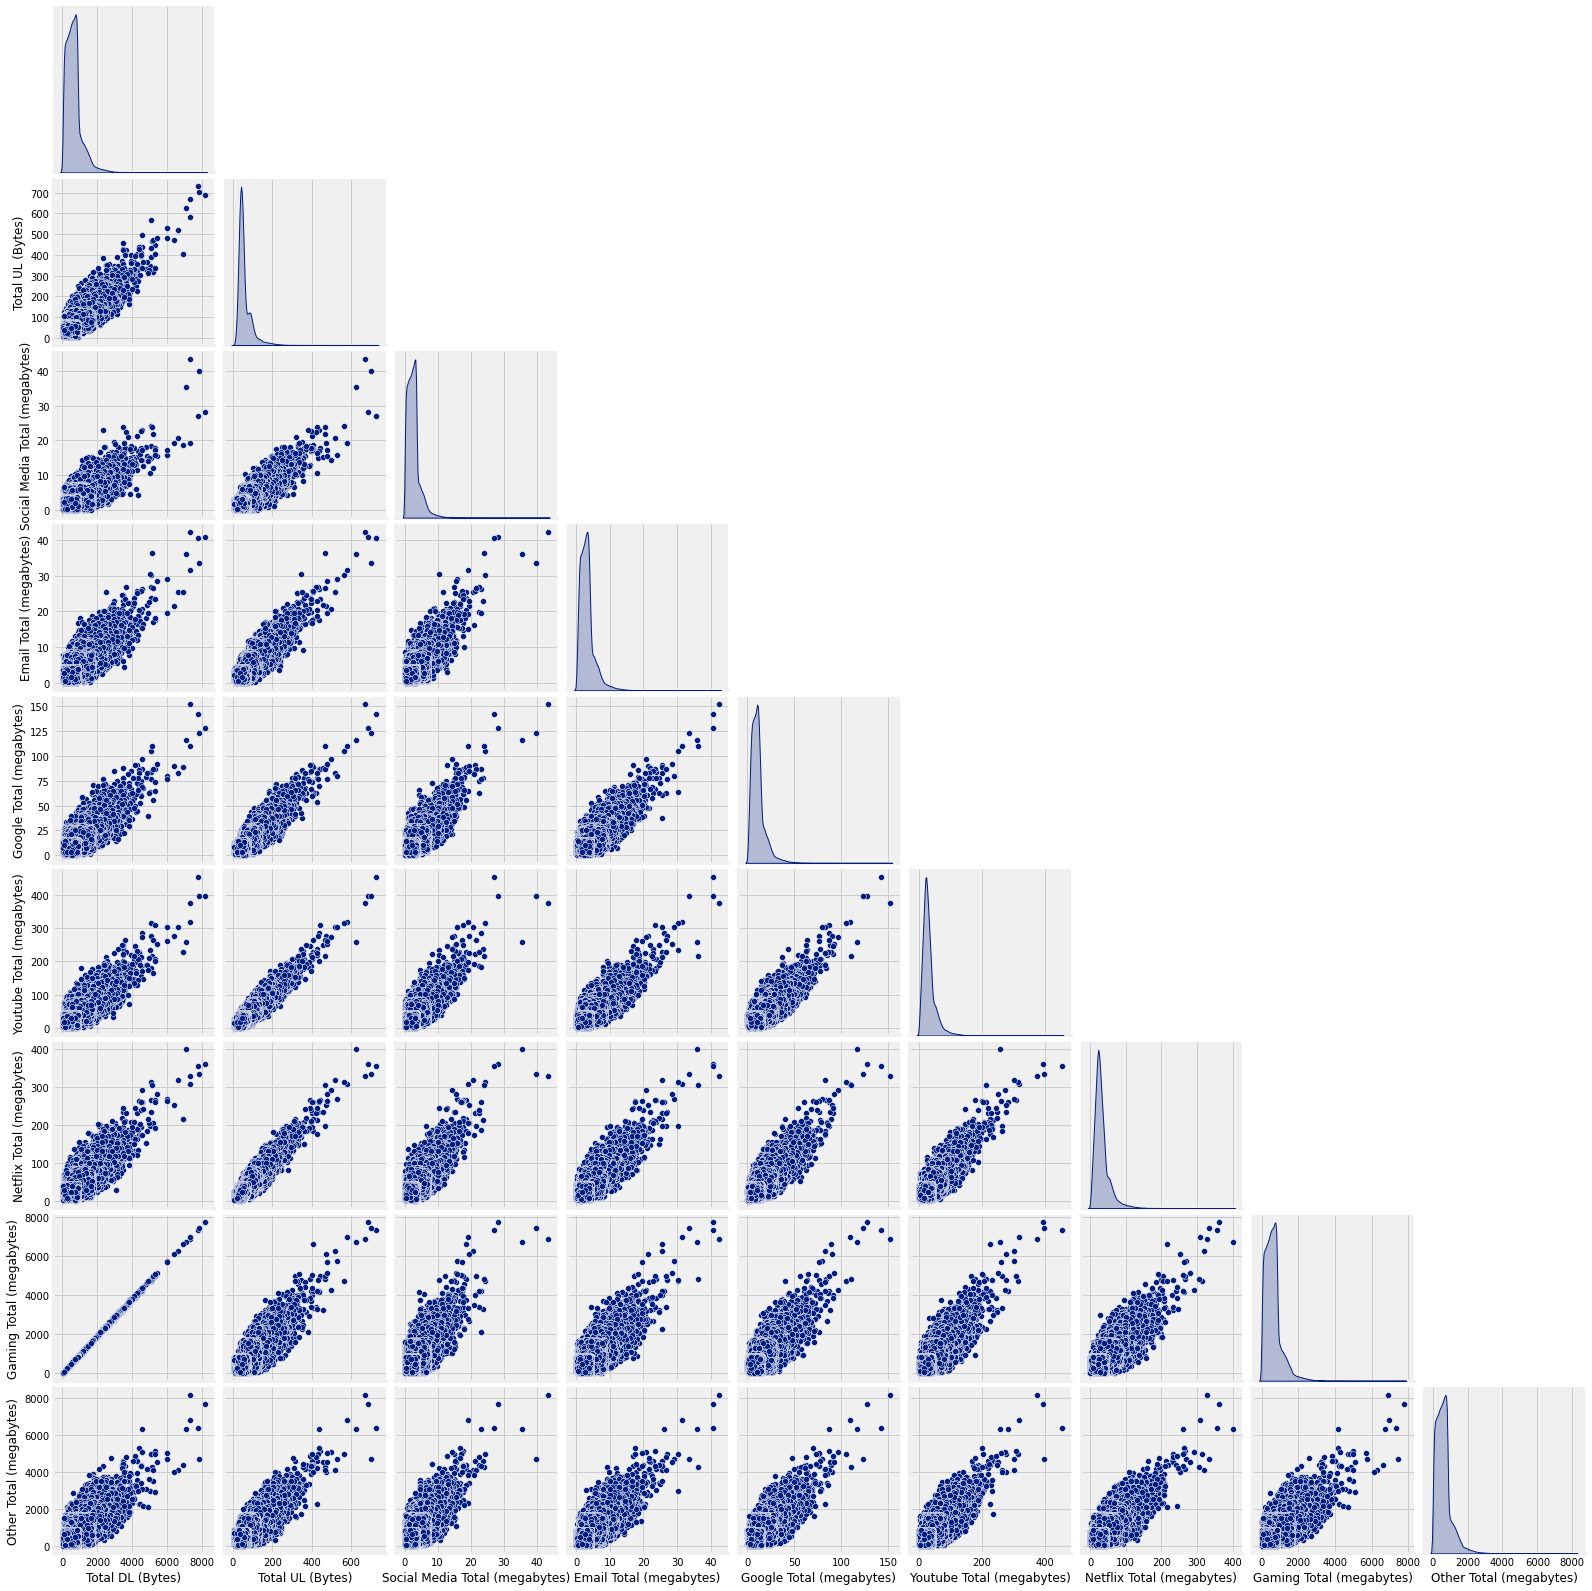

In [152]:
_=sns.pairplot(df_grouped_bytesdata[['Total DL (Bytes)','Total UL (Bytes)','Social Media Total (megabytes)','Email Total (megabytes)','Google Total (megabytes)',
                                     'Youtube Total (megabytes)','Netflix Total (megabytes)','Gaming Total (megabytes)',
                                     'Other Total (megabytes)']],diag_kind='kde',markers=['s'],corner=True)

In [136]:
# bytes_initials=['Total','Social Media','Email','Google','Youtube','Netflix','Gaming','Other'
'Social Media Total (megabytes)',
'Email Total (megabytes)',
'Google Total (megabytes)',
'Youtube Total (megabytes)',
'Netflix Total (megabytes)',
'Gaming Total (megabytes)',
'Other Total (megabytes)',